In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize

# Input path

In [3]:
path2file = "/home/user/YixiTFG/TFG_Yixi/RepoRT_trials/1.RepoRT_GNNs0/Results/"

In [4]:
def get_index_array (num_repos):
    """
    Input: The number of repos you want to use for training
    Output: a numpy array containing the indexes string in the specific format ("0001", e.g.)
    """
    index_array = []
    for index in range(1, num_repos+1):
        index = str (index)
        while len (index) < 4:
            index = "0" + index
        index_array.append (str (index))
    return np.array(index_array)

In [5]:
index_array = get_index_array(440)
MAE_array = []
RMSE_array = []
dir = []
dir_count = 0
true_index = []
for index in index_array:
    try:
        filename = path2file + "Results_" + index + "/"+ "Metrics_"+ index + ".txt"
        f = open (filename).readlines ()
        MAE_array.append (np.float16 (f[0].split (' ') [1]))
        RMSE_array.append (np.float16 (f[1].split (' ') [1]))
        dir_count += 1
        dir.append(dir_count)
        true_index.append (index)
    except:
        print (f"The dir {index} does not exist")
        continue
MAE_array = np.array(MAE_array)
RMSE_array = np.array(RMSE_array)
dir = np.array(dir)
true_index = np.array (true_index)

The dir 0022 does not exist
The dir 0035 does not exist
The dir 0046 does not exist
The dir 0205 does not exist
The dir 0206 does not exist
The dir 0207 does not exist
The dir 0214 does not exist
The dir 0222 does not exist
The dir 0230 does not exist
The dir 0255 does not exist
The dir 0296 does not exist
The dir 0297 does not exist
The dir 0298 does not exist
The dir 0299 does not exist
The dir 0300 does not exist
The dir 0301 does not exist
The dir 0302 does not exist
The dir 0303 does not exist
The dir 0304 does not exist
The dir 0305 does not exist
The dir 0306 does not exist
The dir 0307 does not exist
The dir 0308 does not exist
The dir 0309 does not exist
The dir 0325 does not exist
The dir 0341 does not exist
The dir 0357 does not exist
The dir 0358 does not exist
The dir 0361 does not exist
The dir 0362 does not exist
The dir 0408 does not exist
The dir 0439 does not exist
The dir 0440 does not exist


In [6]:
# Export result to tsv file
filename = path2file + "summary_results.tsv"
summary = pd.DataFrame({
    "Num_repo": true_index,
    "MAE": MAE_array,
    "RMSE": RMSE_array,
})
summary.to_csv (filename , index = False, sep = "\t")

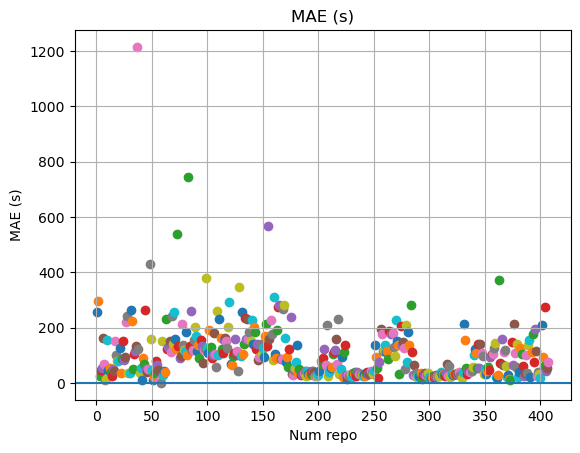

In [46]:
for dir_num, mae in zip (dir, MAE_array):
    plt.scatter (dir_num, mae)
plt.title ("MAE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("MAE (s)")
plt.grid (True)
plt.axhline ()
plt.show ()

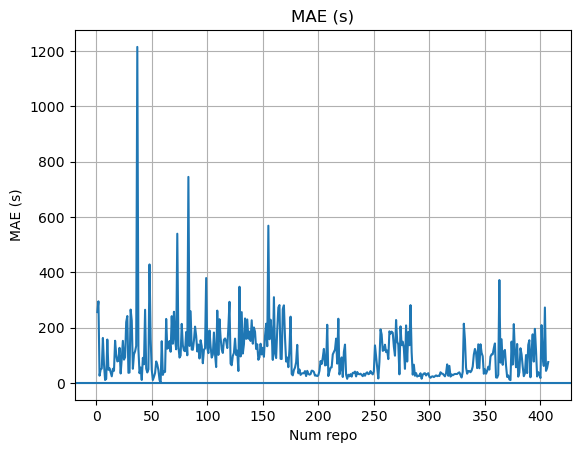

In [47]:
plt.plot (dir, MAE_array)
plt.title ("MAE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("MAE (s)")
plt.grid (True)
plt.axhline ()
plt.show ()

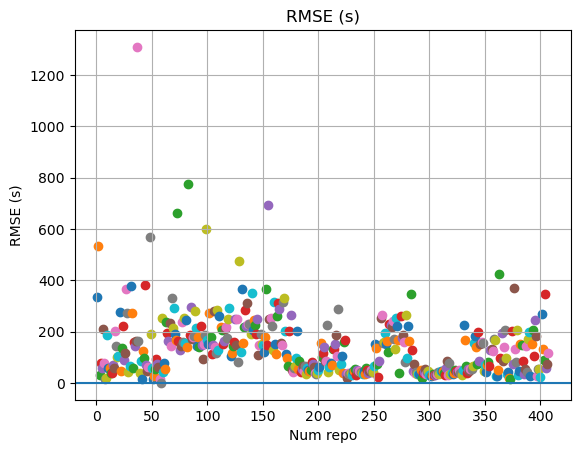

In [48]:
for dir_num, mae in zip (dir, RMSE_array):
    plt.scatter (dir_num, mae)
plt.title ("RMSE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("RMSE (s)")
plt.grid (True)
plt.axhline ()
plt.show ()

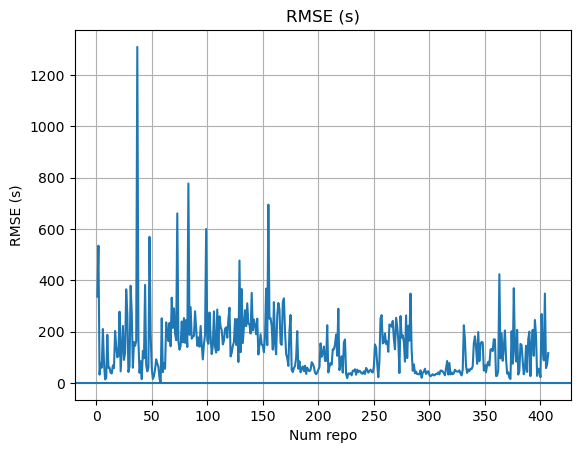

In [49]:
plt.plot (dir, RMSE_array)
plt.title ("RMSE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("RMSE (s)")
plt.grid (True)
plt.axhline ()
plt.show ()

# Get molecule count

In [13]:
path2datafile = "/home/user/YixiTFG/TFG_Yixi/RepoRT_trials/RepoRT_data/RepoRT_data_clean.tsv"
df = pd.read_csv (path2datafile, sep = "\t")

In [14]:
def get_data_from_index (df, index):
    """
    Input: The raw dataframe containing all data and the index of the repo that you want to use for training.
    Output: A subset of the dataframe including all the molecules from the repo number.
    """
    temp_dataframe = df[df ["id"].str.split("_").str[0] == index]
    return temp_dataframe

In [118]:
len (get_data_from_index(df, "0379"))

63

In [26]:
mol_count = []
updated_index_array = []
for index in index_array:
    temp_dataframe = get_data_from_index(df, index)
    if len (temp_dataframe) < 20:
        print (f"The length of this dataset {index} is not gonna be included.")
        continue
    else:
        mol_count.append (np.int64(len(temp_dataframe)))
        updated_index_array.append (index)
mol_count = np.array (mol_count)
mol_count

The length of this dataset 0022 is not gonna be included.
The length of this dataset 0035 is not gonna be included.
The length of this dataset 0046 is not gonna be included.
The length of this dataset 0205 is not gonna be included.
The length of this dataset 0206 is not gonna be included.
The length of this dataset 0207 is not gonna be included.
The length of this dataset 0214 is not gonna be included.
The length of this dataset 0222 is not gonna be included.
The length of this dataset 0230 is not gonna be included.
The length of this dataset 0255 is not gonna be included.
The length of this dataset 0296 is not gonna be included.
The length of this dataset 0297 is not gonna be included.
The length of this dataset 0298 is not gonna be included.
The length of this dataset 0299 is not gonna be included.
The length of this dataset 0300 is not gonna be included.
The length of this dataset 0301 is not gonna be included.
The length of this dataset 0302 is not gonna be included.
The length of 

array([   76,   441,   105,   226,    88,    32,   217,    49,   573,
         112,   228,    98,    48,    50,   155,    48,   230,   236,
         420,   179,    65,    79,   744,   121,    23,   407,    54,
          55,    55,    48,    57,    56,    42,    71,    32,    80,
          69,   102,    94,    74,    69,   818,   665,   216,   916,
         102,   119,   102,   177,    80,   271,   260,   107,    98,
          99,    99,   119,    27,   407,  1551,   161,    63,    50,
         189,   206,   210,   202,   116,   117,   105,   115,   117,
         165,   188,   160,    90,   124,    71,    81,   213,   169,
         158,   163,   159,   114,   142,   151,   153,   148,   163,
         153,   161,   159,   140,   151,   155,   158,    98,    98,
          98,   101,    91,    94,   103,   113,    72,   115,   124,
          80,   100,    87,    93,   105,   104,   118,    94,    92,
         120,   102,    32,   119,   139,   149,   138,    67,    97,
          67,    65,

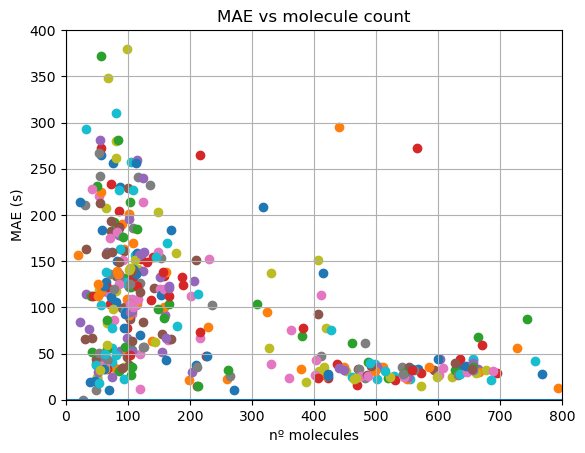

'\nAround 400-500 it seems to reach a plateau where the MAE does not decrease more. Moreover, with mol_count < 400, all could happen:\n    * MAE in (0-400)\n'

In [51]:
for mol_len, mae in zip (mol_count, MAE_array):
    plt.scatter (mol_len, mae)
plt.xlim ([0, 800])
plt.ylim ([0, 400])
plt.title ("MAE vs molecule count")
plt.xlabel ("nº molecules")
plt.ylabel ("MAE (s)")
plt.grid (True)
plt.axhline ()
plt.axvline ()
plt.show ()

"""
Around 400-500 it seems to reach a plateau where the MAE does not decrease more. Moreover, with mol_count < 400, all could happen:
    * MAE in (0-400)
"""

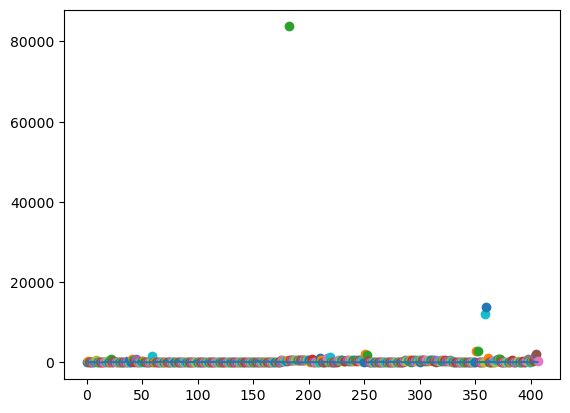

In [117]:
for num_repo, num_mol in zip (range(len(mol_count)), mol_count):
    plt.scatter (num_repo, num_mol)
plt.plot (range(len(MAE_array)), MAE_array, label = "MAE")
plt.show ()

In [59]:
# Get relative error
max_rt_each_repo = []
for index in updated_index_array:
    temp_dataframe = get_data_from_index(df, index)
    max_value = np.max (temp_dataframe["rt"])
    max_rt_each_repo.append (max_value)
max_rt_each_repo = np.array (max_rt_each_repo)
max_rt_each_repo

array([ 21.96      ,  61.2       ,  11.9967    ,  12.        ,
        12.39695199,  31.27734035,  24.8       ,   7.43      ,
         2.15      ,  24.9       ,  24.9       ,  18.68      ,
         5.64333333,   7.73666667,  13.46705305,  10.64375   ,
        31.6       ,  32.01331667,  20.4       ,  15.97      ,
        18.467     ,  19.3       ,  14.7231    ,  21.89      ,
        21.        ,  15.332     ,  41.994     ,  22.73      ,
         5.12      ,  11.14      ,  49.97      ,  13.298     ,
         4.04      ,  43.8       ,  24.62      ,  16.3       ,
       100.52      ,  34.181     ,   4.516     ,   6.76      ,
        14.06825   ,  19.85      ,  16.5       ,  47.        ,
        14.6       ,  13.818     ,  20.27      ,  52.32      ,
        23.75      ,  23.788     ,   5.616425  ,   5.5145    ,
         9.191     ,   9.301     ,   8.01      ,   8.34      ,
         5.55256667,   3.24      ,  19.052     ,  10.55      ,
         9.37      ,  26.31      ,  36.71      ,  29.68

In [61]:
max_rt_each_repo_s = np.array ([ round(max_rt*60, 2) for max_rt in max_rt_each_repo ])
max_rt_each_repo_s

array([1317.6 , 3672.  ,  719.8 ,  720.  ,  743.82, 1876.64, 1488.  ,
        445.8 ,  129.  , 1494.  , 1494.  , 1120.8 ,  338.6 ,  464.2 ,
        808.02,  638.62, 1896.  , 1920.8 , 1224.  ,  958.2 , 1108.02,
       1158.  ,  883.39, 1313.4 , 1260.  ,  919.92, 2519.64, 1363.8 ,
        307.2 ,  668.4 , 2998.2 ,  797.88,  242.4 , 2628.  , 1477.2 ,
        978.  , 6031.2 , 2050.86,  270.96,  405.6 ,  844.1 , 1191.  ,
        990.  , 2820.  ,  876.  ,  829.08, 1216.2 , 3139.2 , 1425.  ,
       1427.28,  336.99,  330.87,  551.46,  558.06,  480.6 ,  500.4 ,
        333.15,  194.4 , 1143.12,  633.  ,  562.2 , 1578.6 , 2202.6 ,
       1780.8 , 1594.2 , 1791.6 , 1642.2 , 1810.2 , 2024.4 , 1781.4 ,
       1810.8 , 1779.6 , 1942.2 , 1802.4 , 1608.  , 1581.6 , 2266.8 ,
       2196.  , 2241.  , 1747.8 , 1804.2 , 1599.6 , 1706.4 , 1936.2 ,
       1596.6 , 1726.8 , 1722.6 , 1723.2 , 1723.8 , 2041.8 , 1840.2 ,
       1606.2 , 1825.8 , 1530.6 , 1582.2 , 1798.2 , 1523.4 , 1719.6 ,
       2458.8 , 1057

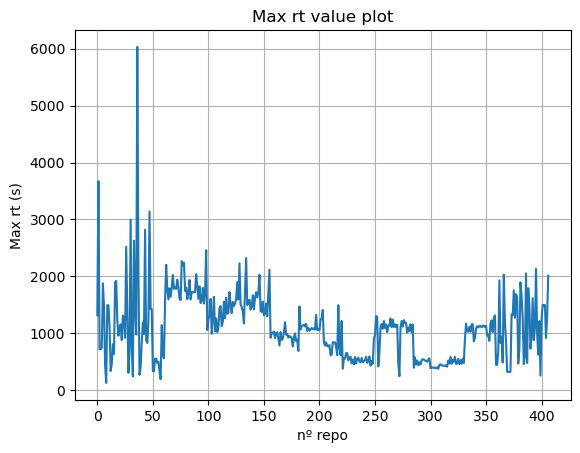

'\nThe first part of the plot, around 0-50, the max_rt value has great variation.\n'

In [63]:
plt.plot (range(len(max_rt_each_repo_s)), max_rt_each_repo_s)
plt.grid (True)
plt.title ("Max rt value plot")
plt.xlabel ("nº repo")
plt.ylabel ("Max rt (s)")
plt.show ()
# Not all repo included. It is just orientative.

"""
The first part of the plot, around 0-50, the max_rt value has great variation.
"""

In [65]:
# Get relative error rate (to the max rt value)
summary ["max rt"] = max_rt_each_repo_s
summary ["Relative MAE (%)"] = round (summary ["MAE"] *100/ summary ["max rt"], 2)
summary ["Relative RMSE (%)"] = round (summary ["RMSE"] *100/ summary ["max rt"],2)
summary.to_csv (filename , index = False, sep = "\t")


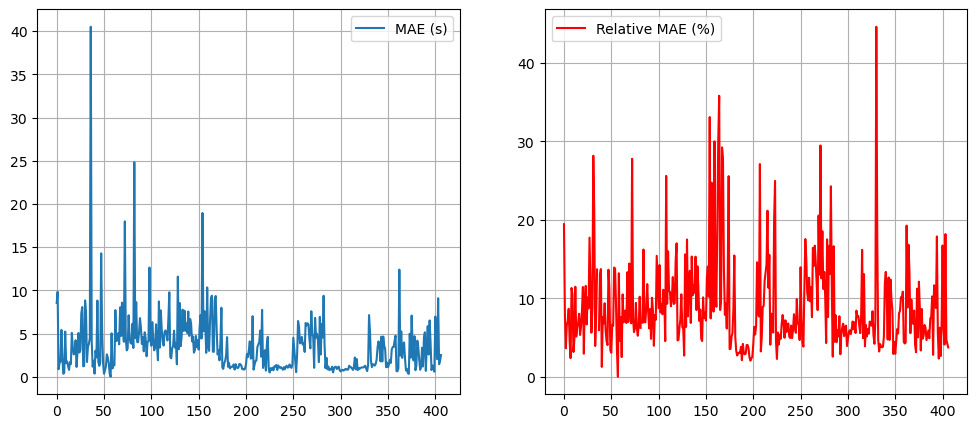

In [109]:
fig, axis = plt.subplots (1,2, figsize = (12,5))
relative_mae = summary ["Relative MAE (%)"]
axis [0].plot (range(len(MAE_array)), MAE_array, label = "MAE (s)")
axis [0].grid (True)
axis [0].legend()
axis [1].plot (range(len(relative_mae)), relative_mae, label = "Relative MAE (%)", color = 'r')
axis [1].grid (True)
axis [1].legend ()
plt.show ()

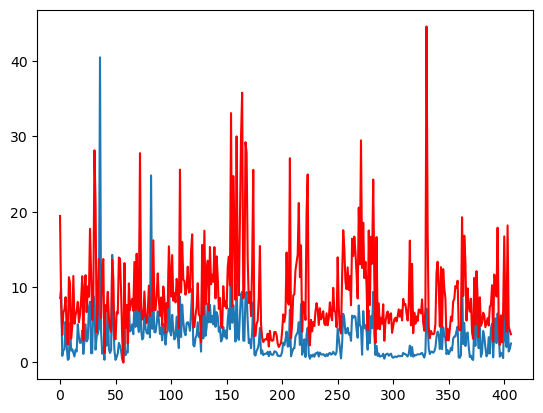

In [116]:
plt.plot (range(len(MAE_array)), MAE_array/30, label = "MAE (s)")
plt.plot (range(len(MAE_array)), relative_mae, label = "MAE (s)", color = 'r')
plt.show ()